In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import * 
import seaborn as sb
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from sklearn.feature_extraction import DictVectorizer

In [54]:
data = pd.read_csv('Housing.csv')

In [55]:
housing = data.copy()

In [56]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [57]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [58]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [59]:
housing.describe().round()

,price,area,bedrooms,bathrooms,stories,parking
count,545.0,545.0,545.0,545.0,545.0,545.0
mean,4766729.0,5151.0,3.0,1.0,2.0,1.0
std,1870440.0,2170.0,1.0,1.0,1.0,1.0
min,1750000.0,1650.0,1.0,1.0,1.0,0.0
25%,3430000.0,3600.0,2.0,1.0,1.0,0.0
50%,4340000.0,4600.0,3.0,1.0,2.0,0.0
75%,5740000.0,6360.0,3.0,2.0,2.0,1.0
max,13300000.0,16200.0,6.0,4.0,4.0,3.0


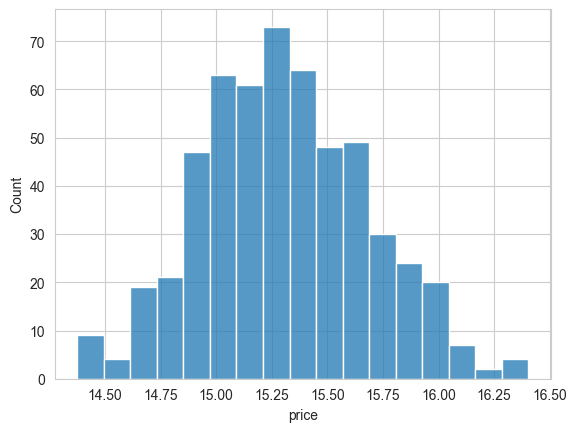

In [60]:
sb.histplot(np.log1p(housing['price'][housing['price'] < 20300000]))
xlabel = 'Price'
ylabel = 'Frequency'
sb.set_style('whitegrid')

In [61]:
housing['price'][housing['price'] < 10000000000].sort_values(ascending=False)

0      13300000
2      12250000
1      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
543     1750000
542     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [62]:
housing.groupby('prefarea')['price'].agg({'mean', 'max', 'min'}).round().reset_index()

,prefarea,max,min,mean
0,no,12250000,1750000,4425299.0
1,yes,13300000,2233000,5879046.0


Seperate Target and Features into two separate dataframes

In [63]:
features = housing.drop( columns = 'price')
target = housing.price

Split the data in both target and features dataframes into train and test dataframes using a 70/30 split

In [64]:
features_train, features_test_init, target_train, target_test_init = train_test_split(features, target, test_size = 0.3, random_state = 11)

In [65]:
print(f'{len(features)}', f'{len(features_train)}', f'{len(features_test_init)}')
print(len(target), len(features_train), len(features_test_init))


545 381 164
545 381 164


Split the the initial test data(features_test_init and target_test_init) into validation and test dataframes using a 50/50 split

In [66]:
feaetures_test, features_valid, target_test, target_valid = train_test_split(features_test_init, target_test_init, test_size = 0.5, random_state = 11)

In [67]:
print( len(features_test), len(features_valid), len(target_test), len(target_valid))

164 82 82 82


Use only numerical values to predict the target variable

Select baseline numerical features

In [68]:
baseline = ['bedrooms', 'area', 'stories', 'parking']
features_train_bl = features_train[baseline]
features_valid_bl = features_valid[baseline]

Convert the target variables to log values in numpy arrays

In [69]:
target_test = np.log1p(target_test).values
target_valid = np.log1p(target_valid).values
target_train = np.log1p(target_train).values

Fetch only values for the baseline features

In [70]:
features_train_bl = features_train_bl.values

train a linear regression model on the baseline features against the target variable

In [71]:
lrmodel = LinearRegression()
lrmodel.fit(features_train_bl, target_train)

LinearRegression()

Predict the target variable for some of the validation data

In [72]:
target_prediction = lrmodel.predict(features_valid_bl)
print(target_prediction[0:10].round())
print(target_valid[0:10])

[15. 15. 15. 16. 16. 15. 15. 15. 15. 15.]
[15.26712462 15.24222707 14.89392048 14.91745097 15.83838188 15.03781461
 15.25059532 14.89392048 15.56296994 14.89392048]


C:\Users\Dwayne\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Check how off your model is

In [77]:
rmse = root_mean_squared_error( target_valid, target_prediction )
print(rmse.round(2))

0.27


In [87]:
accuracy = r2_score(target_valid, target_prediction)
print(f'{accuracy : .2f}')

 0.46


# Prediction using Feature Engineering

First select the features that we will use to predict the target variable either numerical or categorical

In [89]:
features.head(2)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [90]:
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

features_train_fe = features_train[numerical_features + categorical_features]
features_valid_fe = features_valid[numerical_features + categorical_features]

Then convert the selected to dictionaries

In [91]:
features_train_fe_dict = features_train_fe.to_dict(orient = 'records')
features_valid_fe_dict = features_valid_fe.to_dict(orient = 'records')

Convert the Dictionaries to vector matrix

In [93]:
dvect = DictVectorizer()
dvect.fit(features_train_fe_dict)

DictVectorizer()

transform the vector matrix to a sparse matrix

In [94]:
features_train_fe = dvect.transform(features_train_fe_dict)
features_valid_fe = dvect.transform(features_valid_fe_dict)

Train a linear regression model

In [95]:
lrmodel_fe = LinearRegression()
lrmodel_fe.fit(features_train_fe, target_train)

LinearRegression()

In [99]:
target_prediction_fe = lrmodel_fe.predict(features_valid_fe)
print(target_prediction_fe[0:10].round(2))
print(target_valid[0:10].round(2))

[15.29 15.22 15.23 15.29 15.83 15.55 14.93 15.22 15.23 14.92]
[15.27 15.24 14.89 14.92 15.84 15.04 15.25 14.89 15.56 14.89]


In [103]:
rmse_fe = root_mean_squared_error( target_valid, target_prediction_fe )
print(rmse_fe.round(2))

0.21


In [101]:
accuracy = r2_score(target_valid, target_prediction_fe)
print(f'{accuracy : .2f}')

 0.66
